In [1]:
import pandas as pd
import glob
import os
import re

In [2]:
path = os.getcwd()
# print(path)
# use your path
path = os.path.join(path , "/")
extension = 'csv'
all_files = glob.glob('*.{}'.format(extension))
# print(all_files)

dfs = []
nameabs = [] 
numabs = []

for filename in all_files:
    # print(filename)
    if filename == 'distances_distribution.csv':
        pass
    if filename == 'distances_distribution_whole_day.csv':
        pass
    else:
        nameabs.append(filename.split('_')[0])
        # print(filename.split('_')[0])
        # print(re.search('_(.*)_', filename).group(1))
        # num =re.search('_(.*)_', filename)
        # print(num)
        numabs.append(re.search('_(.*)_', filename).group(1))

        df = pd.read_csv(filename, index_col=None, header=0)
        dfs.append(df)


In [3]:
distanciesllago = pd.read_csv('yago/distances_distribution.csv', sep=',')
distanciesllago.distancia = distanciesllago.distancia.astype(str)
distanciesllago.distancia = distanciesllago.distancia.str.replace(',', '-')
distanciesllago.distancia = distanciesllago.distancia.str.replace('[', '')
distanciesllago.distancia = distanciesllago.distancia.str.replace(']', '')
distanciesllago.distancia = distanciesllago.distancia.str.replace('(', '')
distanciesllago, distanciesllago.dtypes

/tmp/ipykernel_102/590305291.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllago.distancia = distanciesllago.distancia.str.replace('[', '')
/tmp/ipykernel_102/590305291.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllago.distancia = distanciesllago.distancia.str.replace(']', '')
/tmp/ipykernel_102/590305291.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllago.distancia = distanciesllago.distancia.str.replace('(', '')


(    abs_origen distancia  distancia_perc
 0           25     0.5-2        0.422123
 1           25       2-5        0.345349
 2           25      5-10        0.118362
 3           25     10-20        0.076774
 4           25     20-50        0.032657
 ..         ...       ...             ...
 79         351       2-5        0.388010
 80         351      5-10        0.141102
 81         351     10-20        0.094642
 82         351     20-50        0.063694
 83         351       >50        0.030498
 
 [84 rows x 3 columns],
 abs_origen          int64
 distancia          object
 distancia_perc    float64
 dtype: object)

In [4]:
distanciesllagoALL = pd.read_csv('yago/distances_distribution_whole_day.csv', sep=',')
distanciesllagoALL.distancia = distanciesllagoALL.distancia.astype(str)
distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace(',', '-')
distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace('[', '')
distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace(']', '')
distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace('(', '')
distanciesllagoALL, distanciesllagoALL.dtypes

/tmp/ipykernel_102/2747246035.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace('[', '')
/tmp/ipykernel_102/2747246035.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace(']', '')
/tmp/ipykernel_102/2747246035.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  distanciesllagoALL.distancia = distanciesllagoALL.distancia.str.replace('(', '')


(    abs_origen distancia  distancia_perc
 0           25     0.5-2       49.873307
 1           25       2-5       30.713875
 2           25      5-10       10.277374
 3           25     10-20        6.172506
 4           25     20-50        2.591304
 ..         ...       ...             ...
 79         351       2-5       42.333574
 80         351      5-10       13.431267
 81         351     10-20        8.339342
 82         351     20-50        4.127614
 83         351       >50        1.535088
 
 [84 rows x 3 columns],
 abs_origen          int64
 distancia          object
 distancia_perc    float64
 dtype: object)

/nfs/pic.es/user/a/aoros/.local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


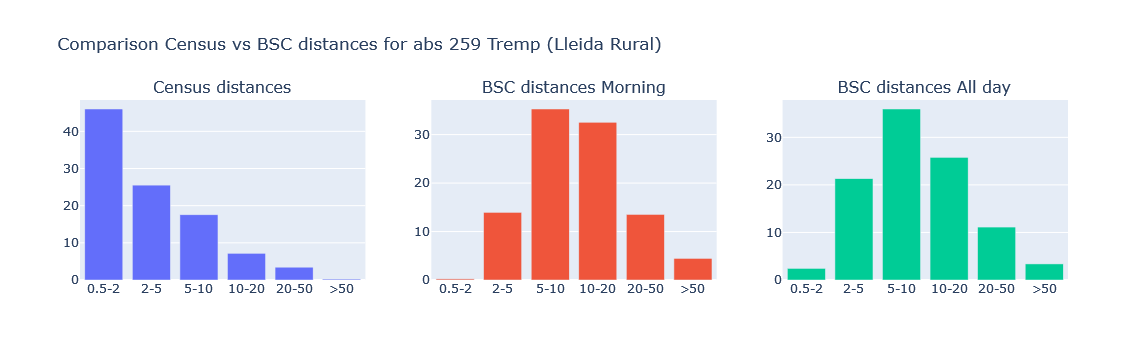

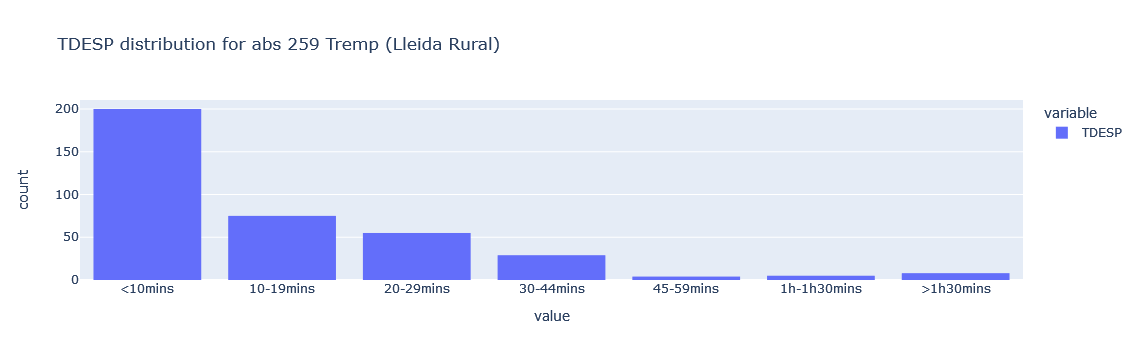

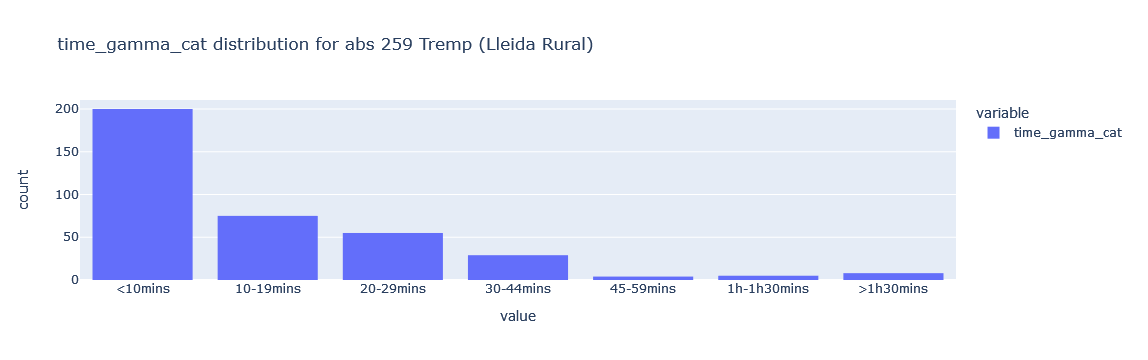

/nfs/pic.es/user/a/aoros/.local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



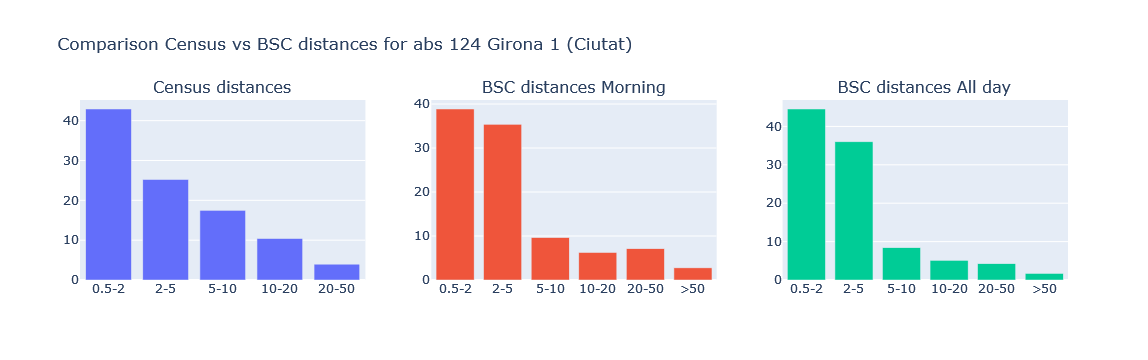

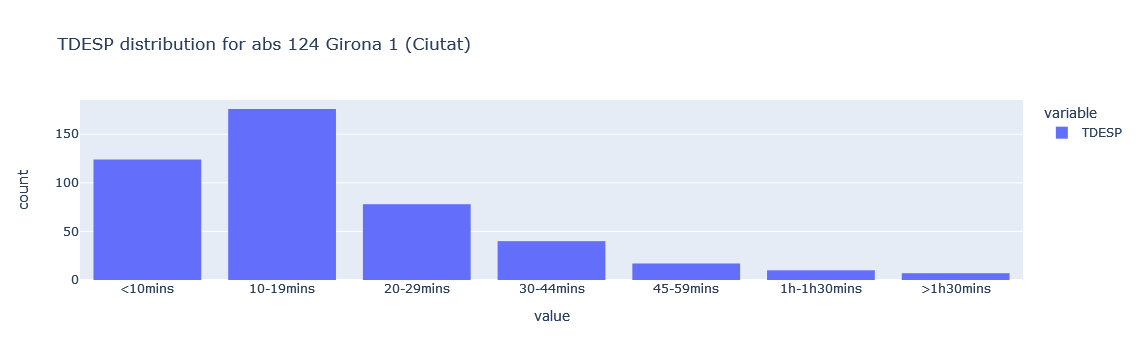

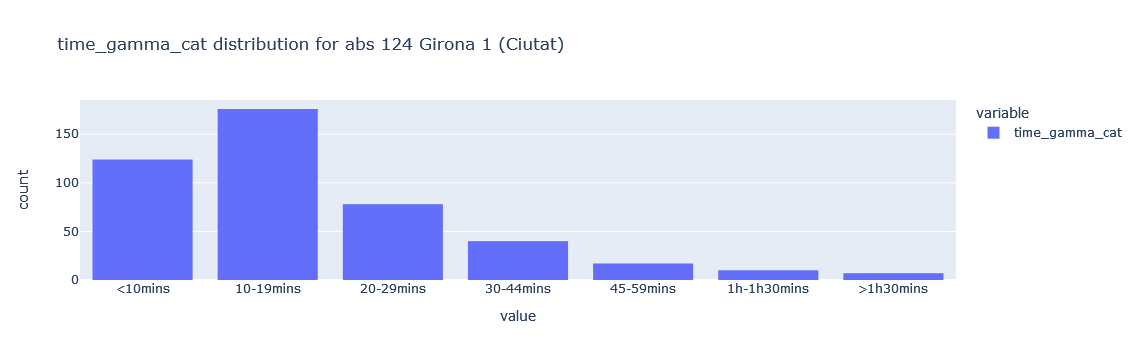

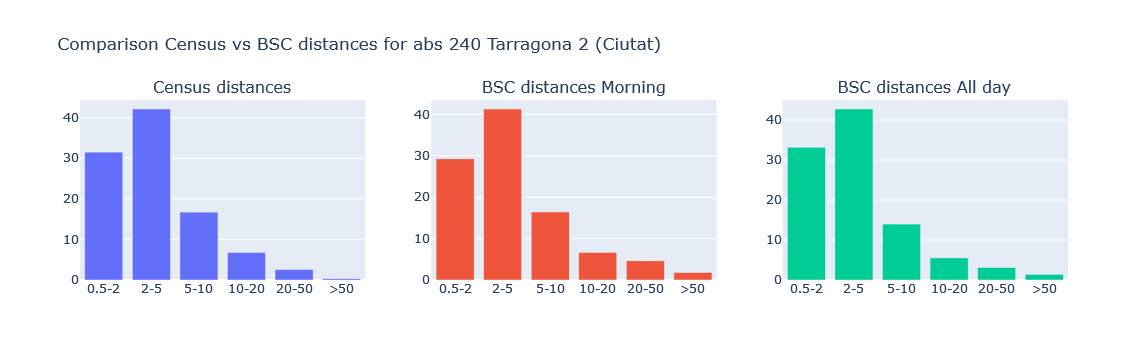

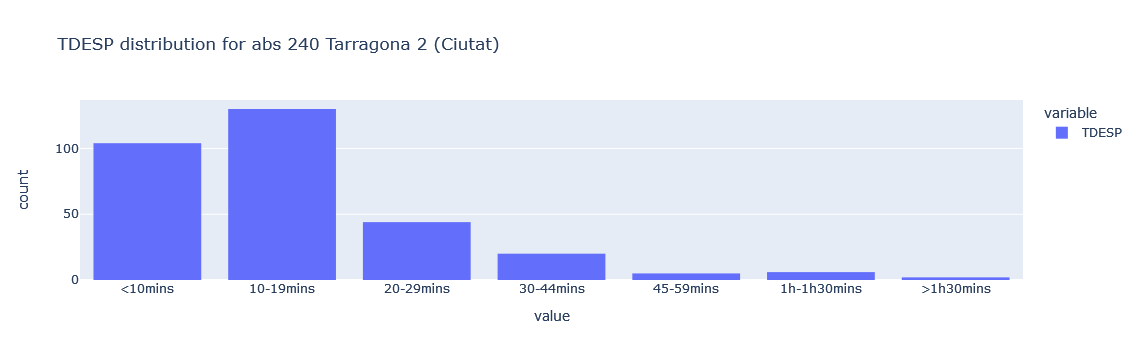

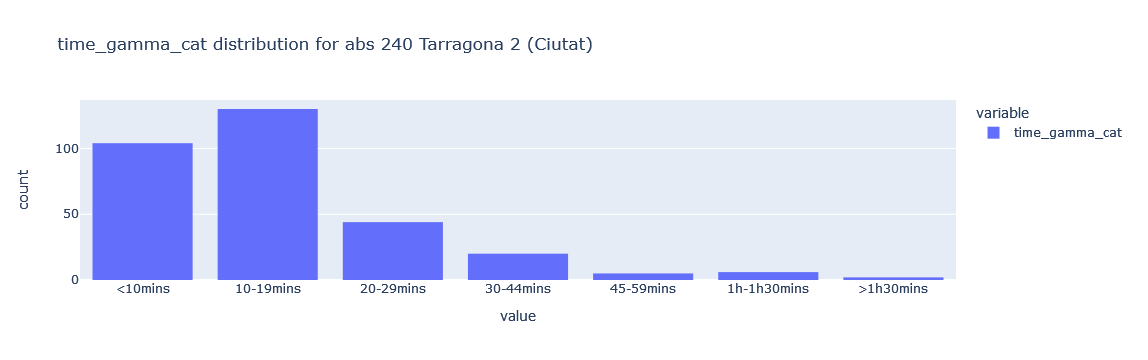

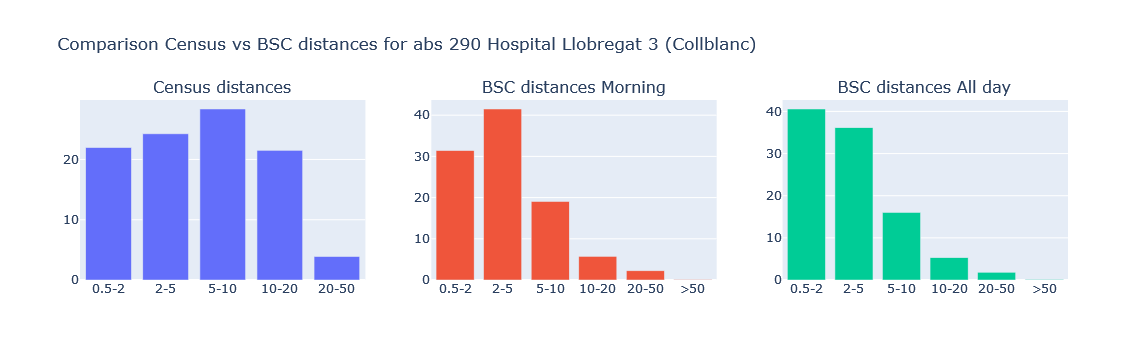

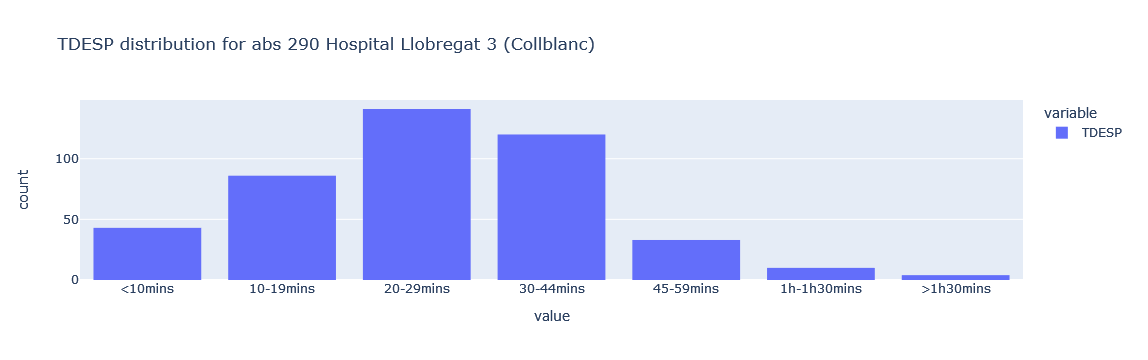

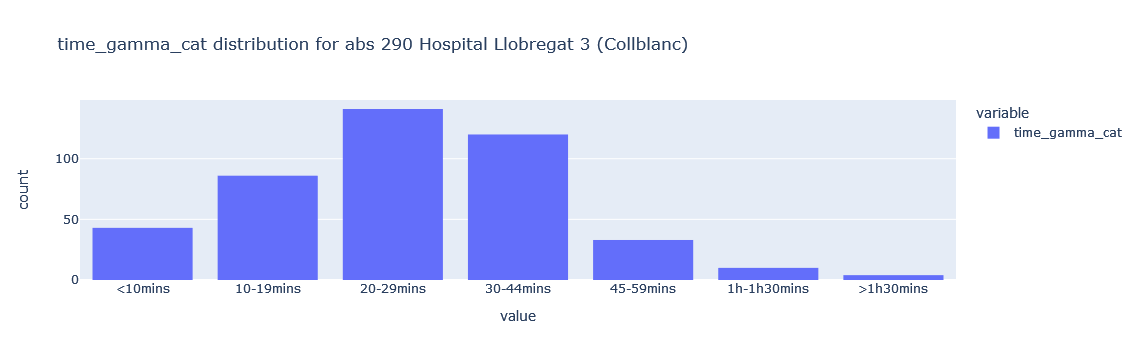

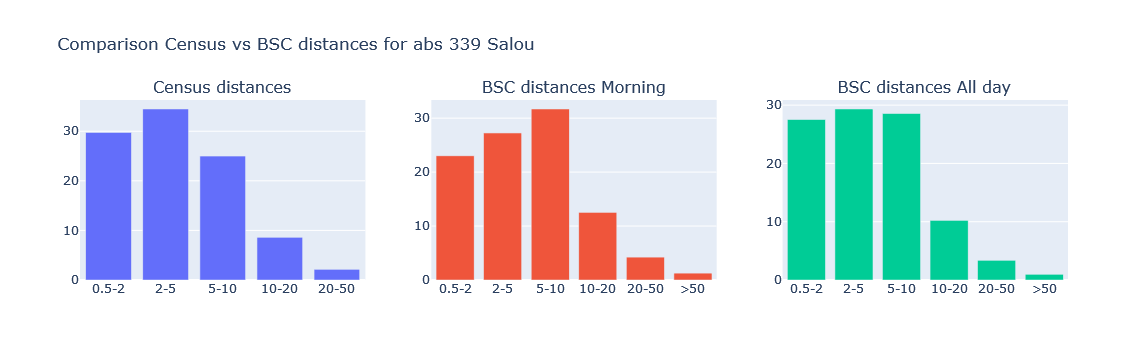

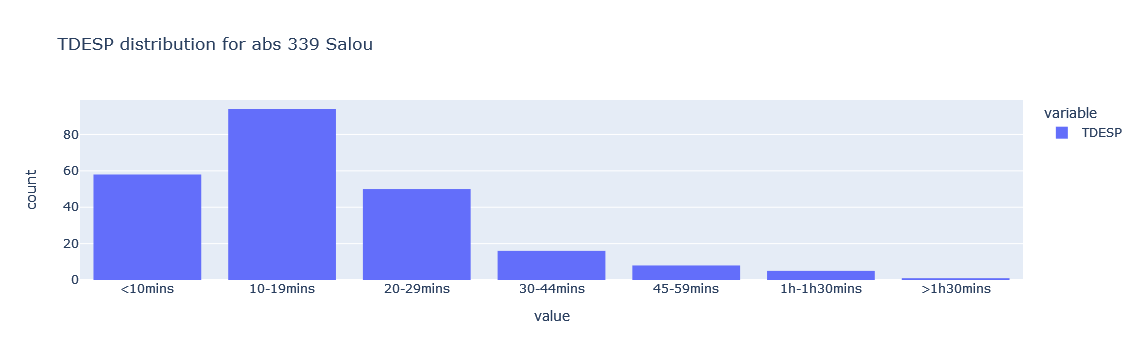

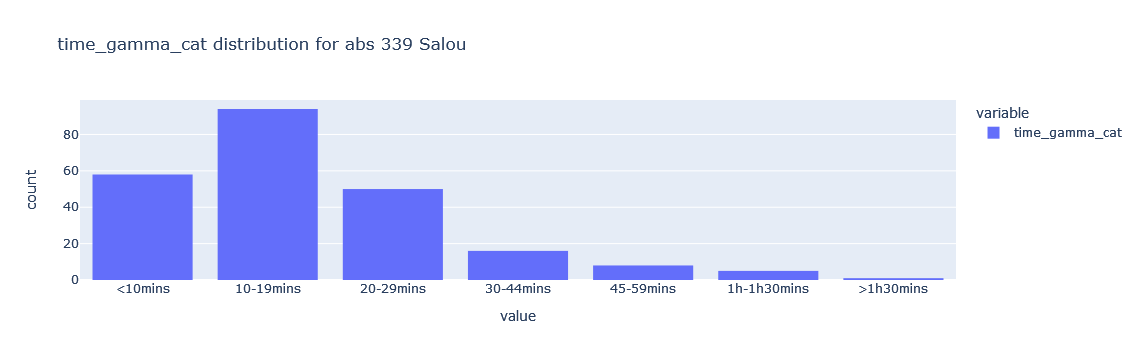

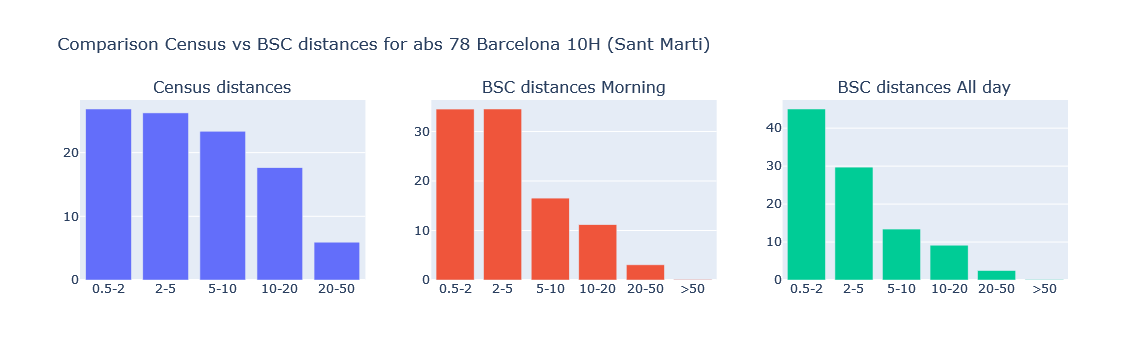

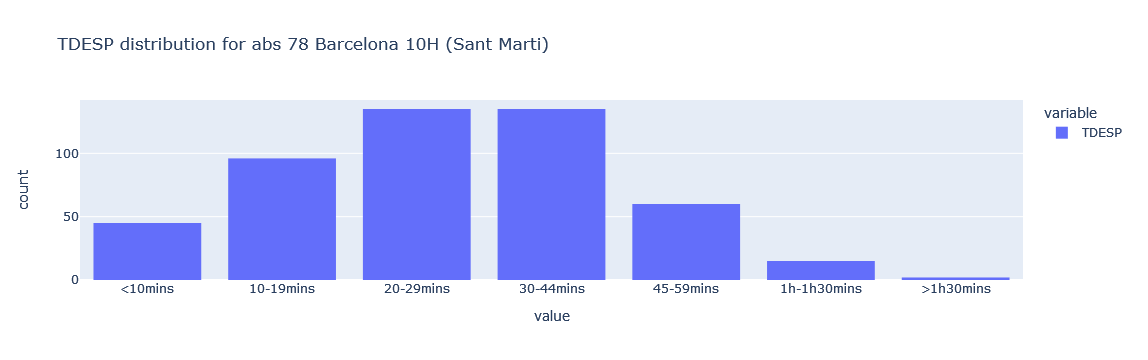

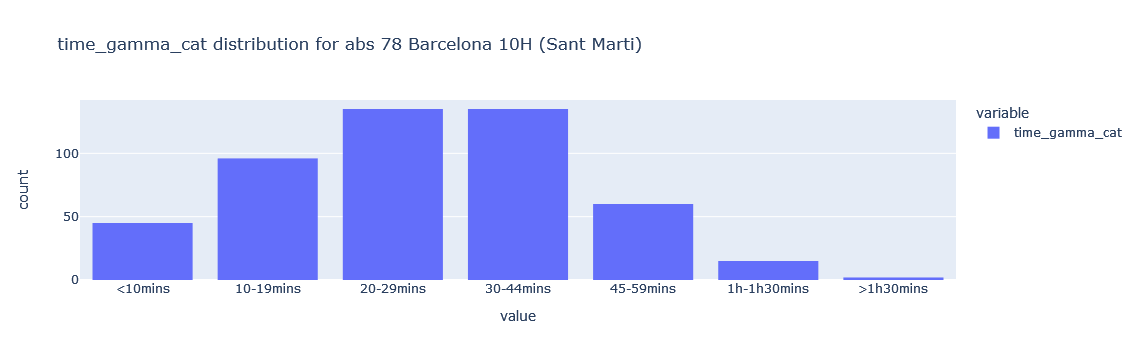

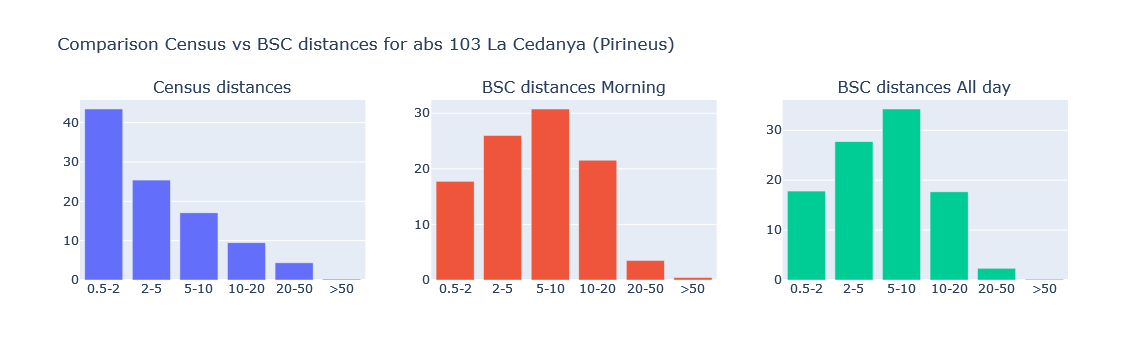

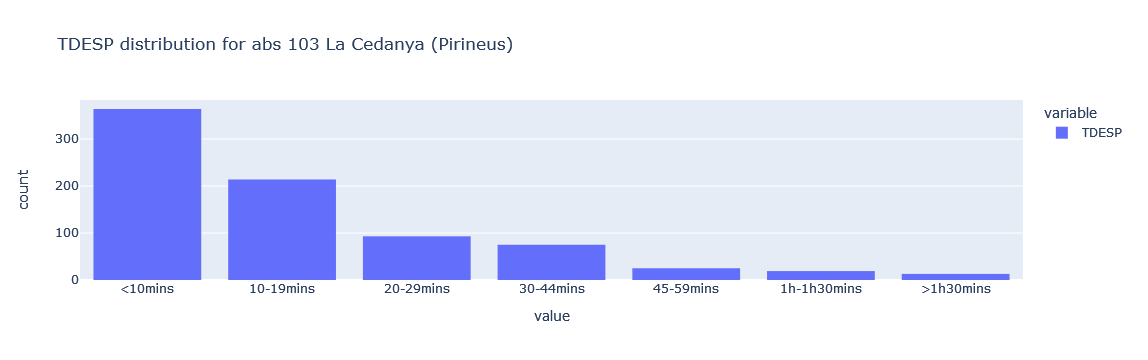

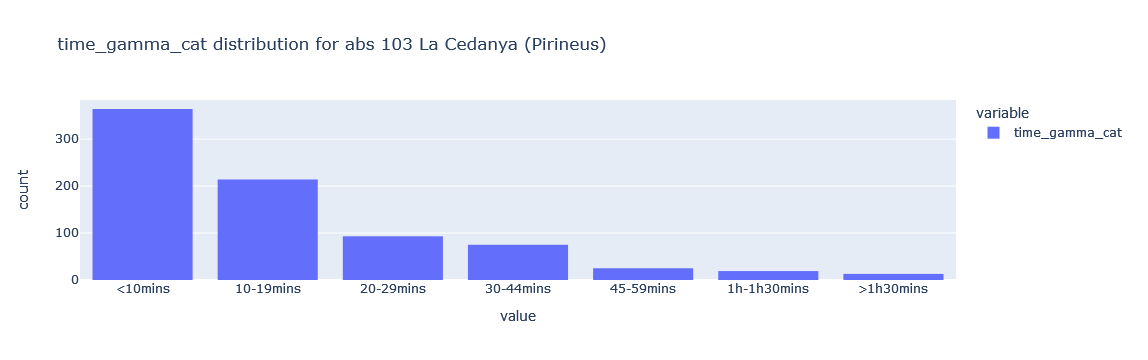

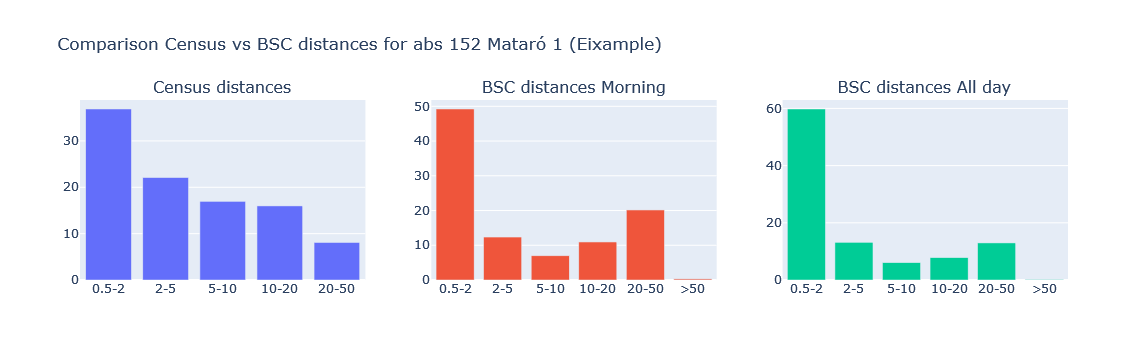

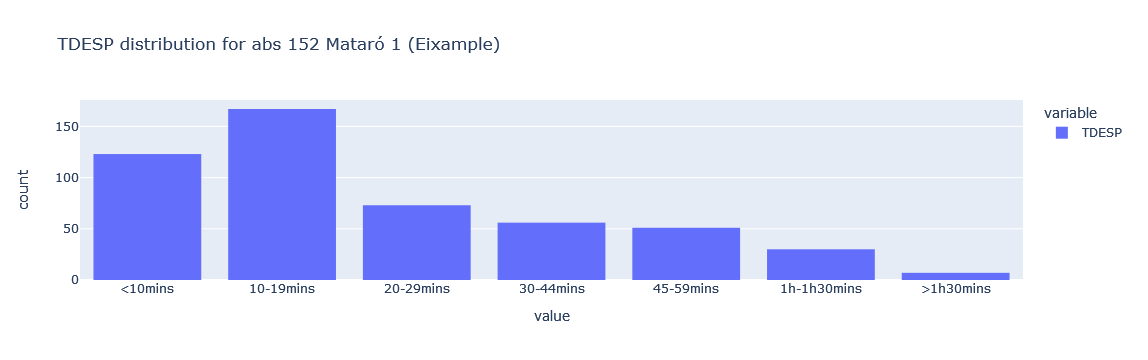

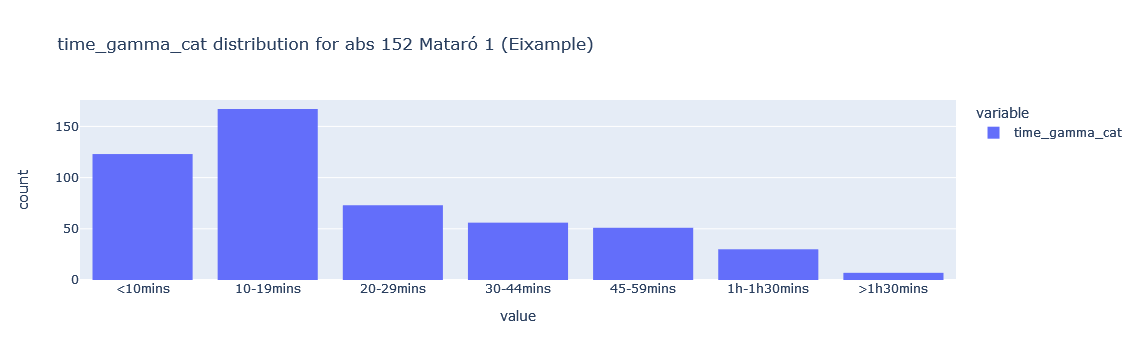

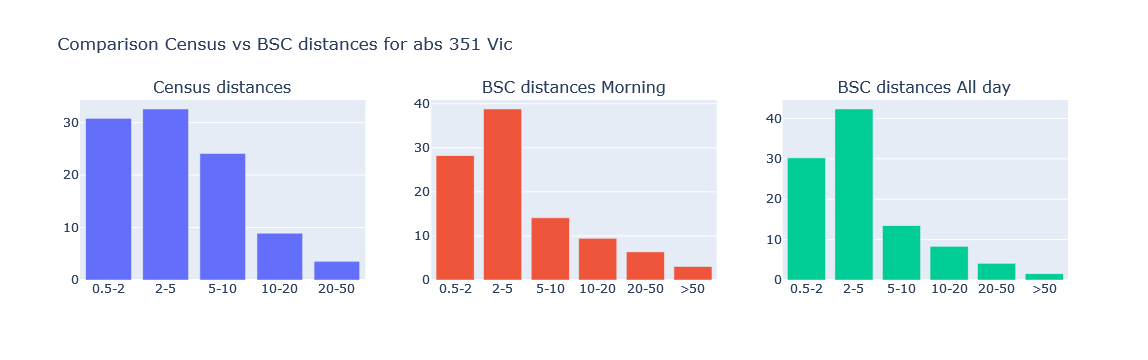

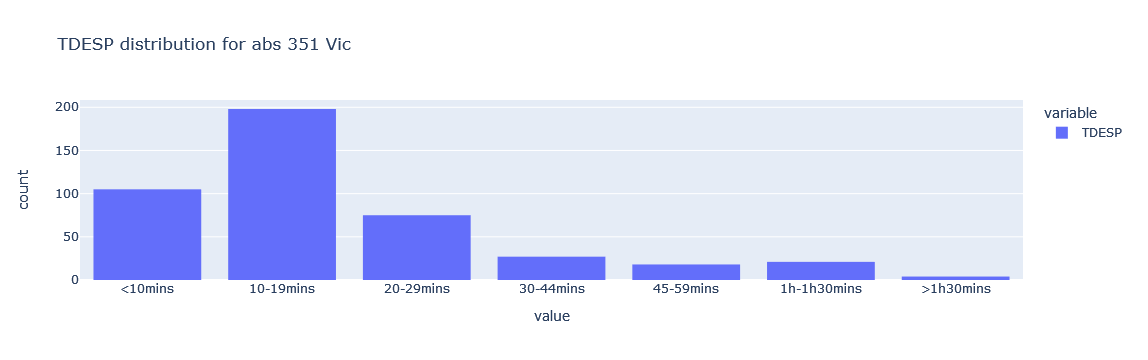

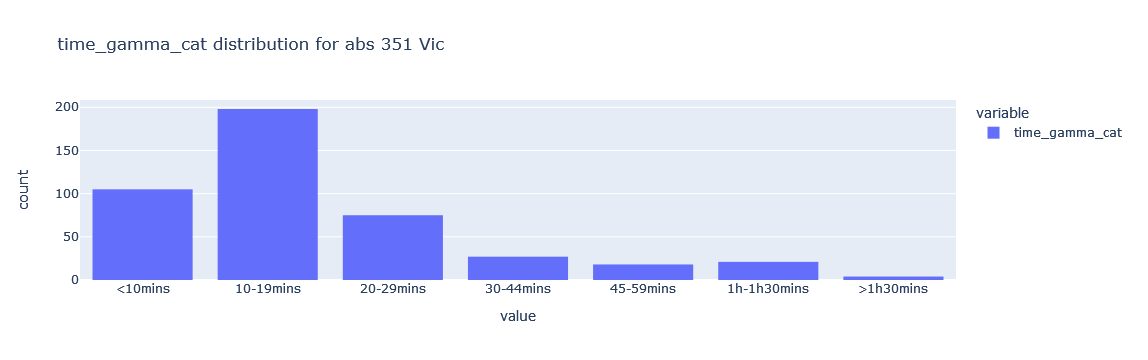

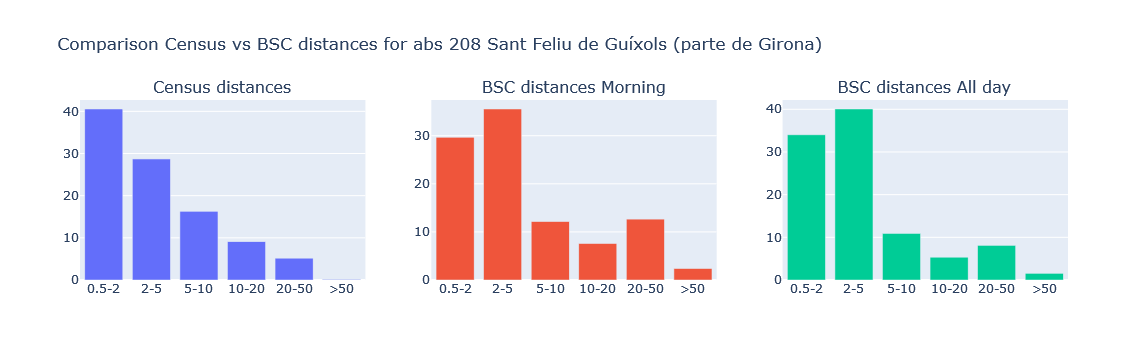

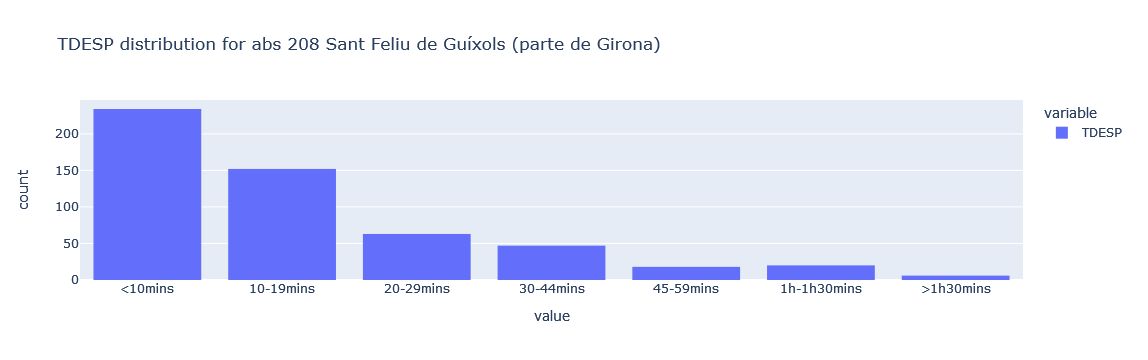

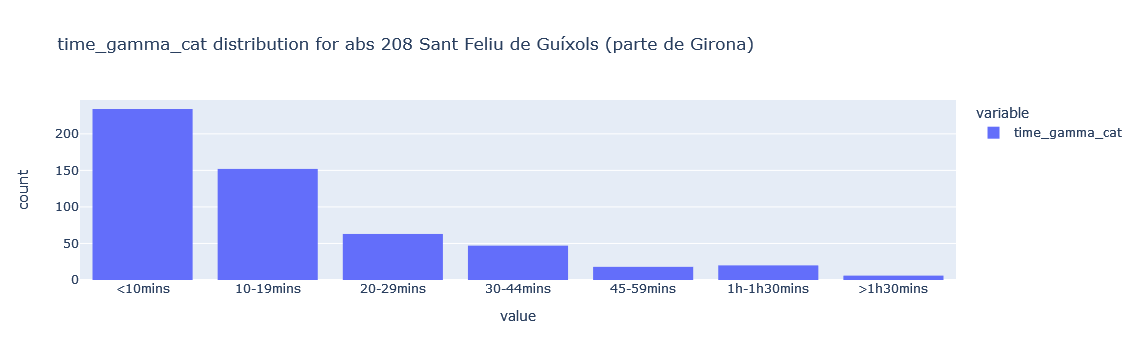

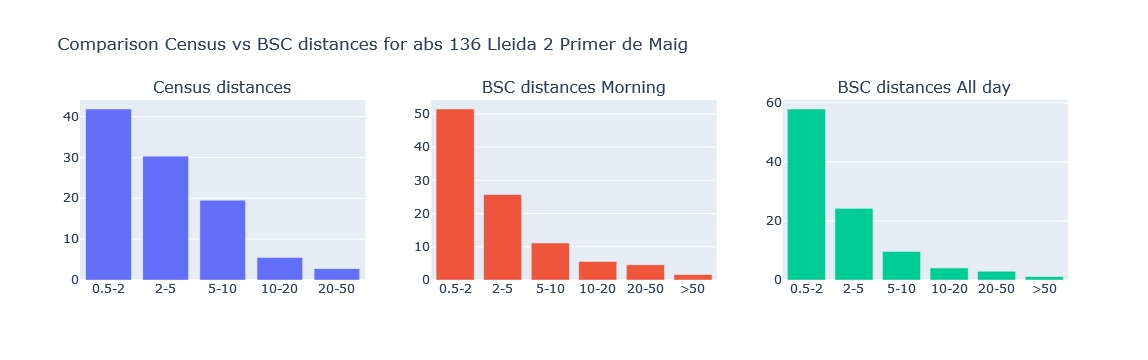

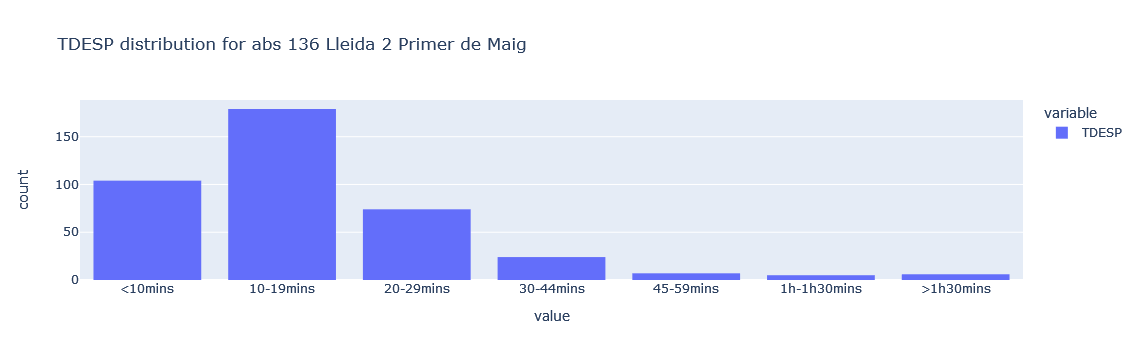

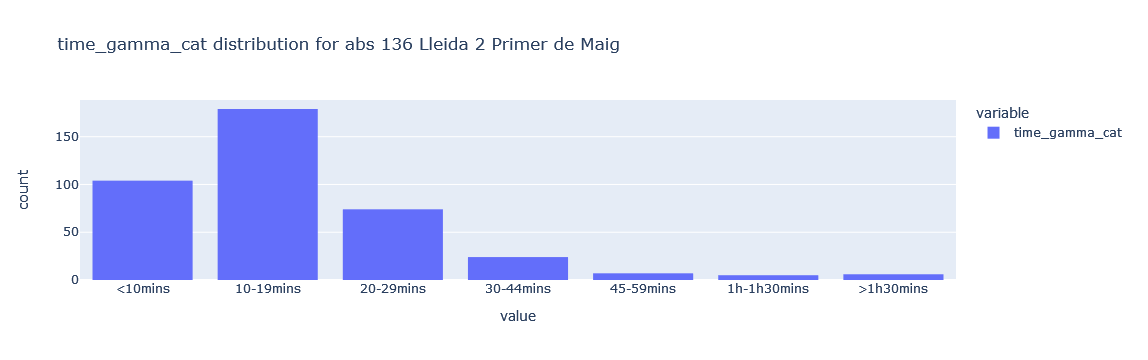

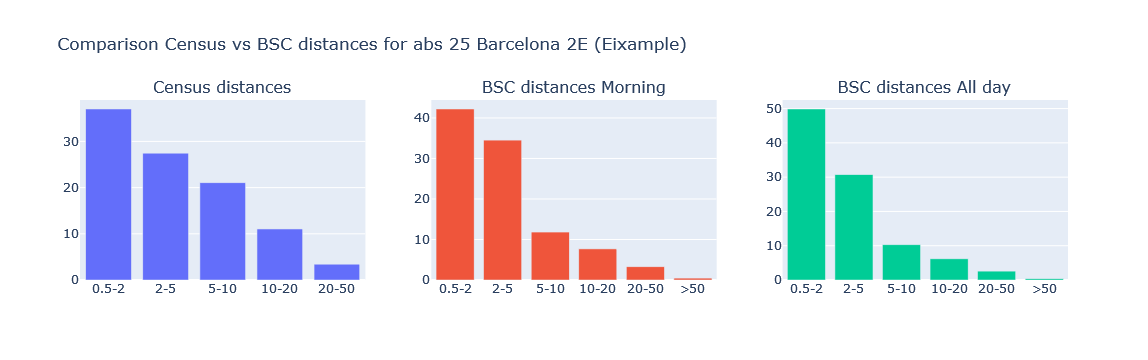

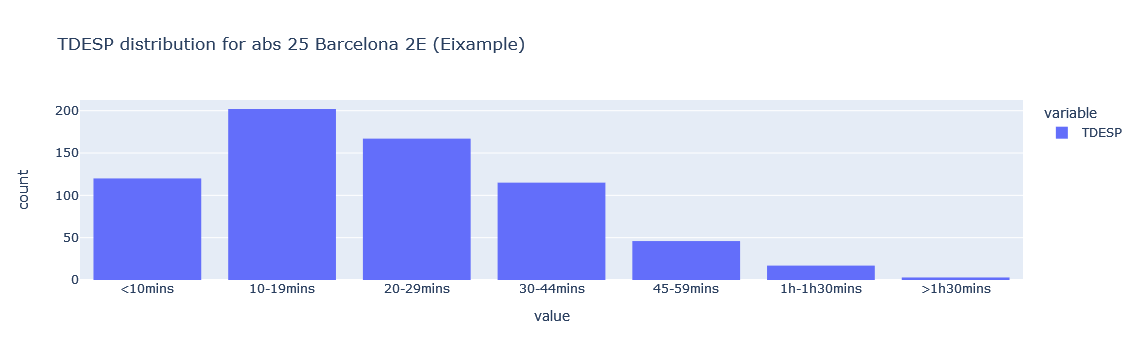

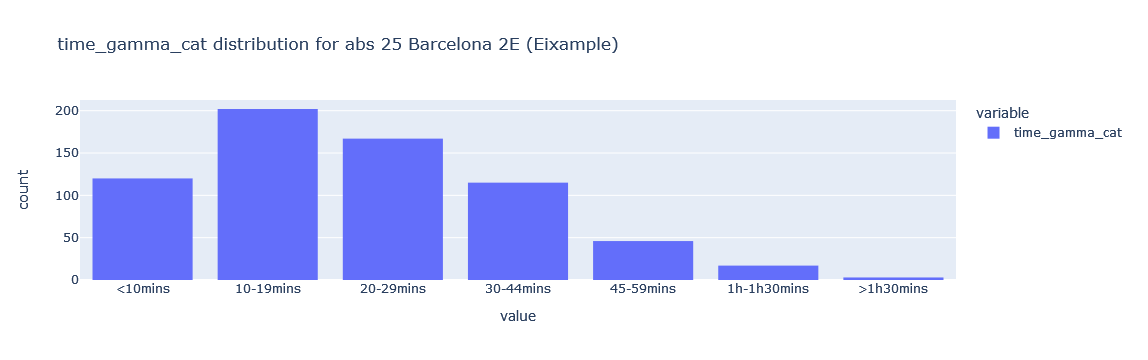

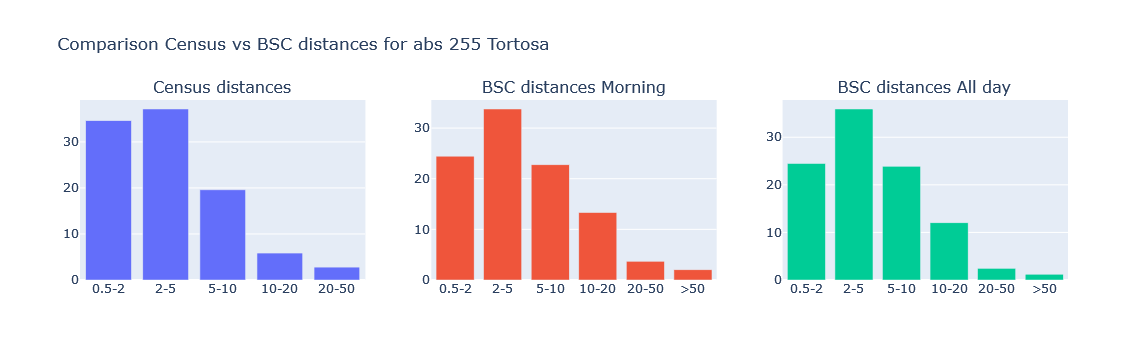

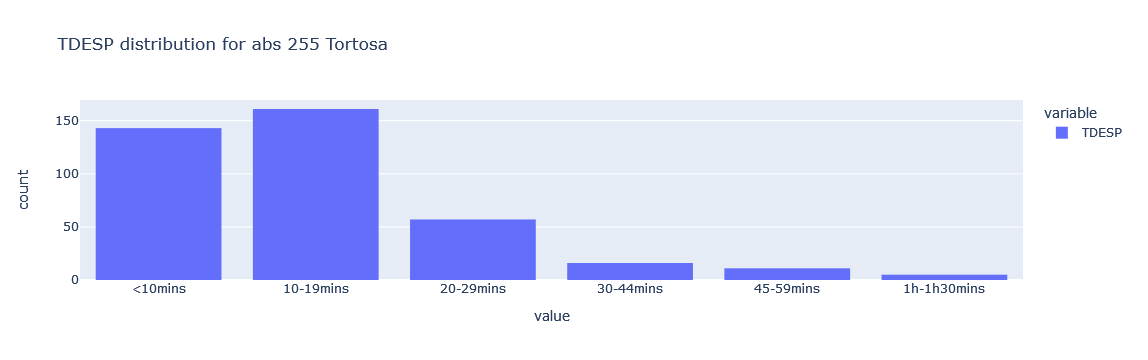

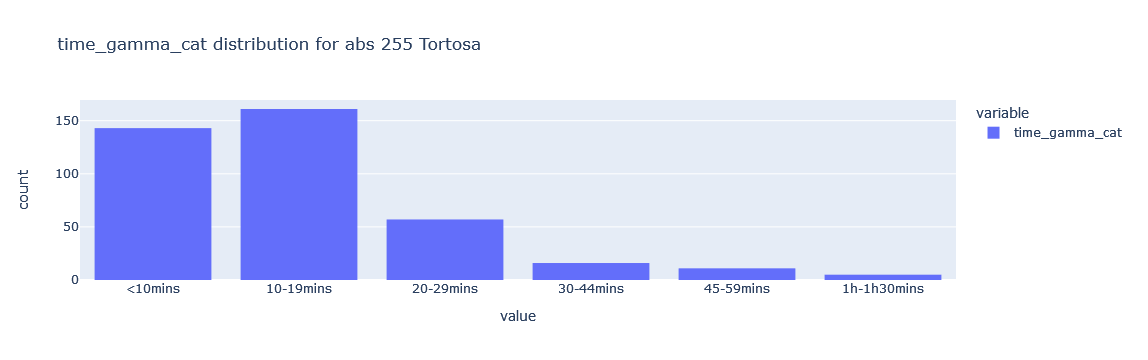

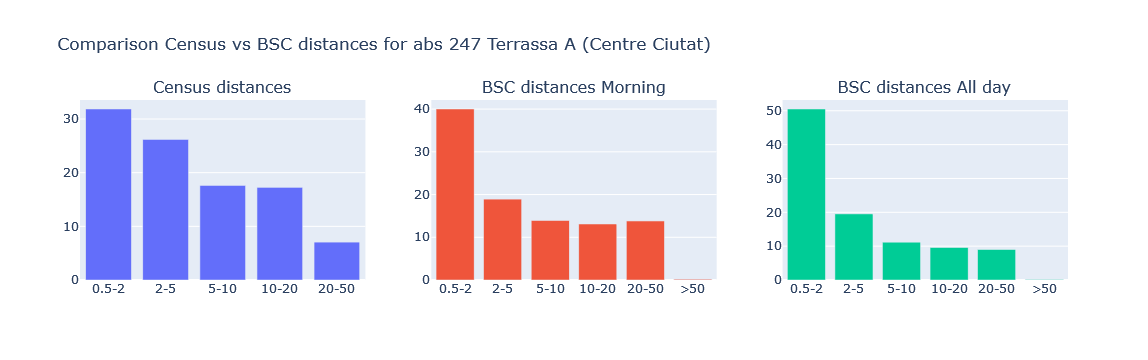

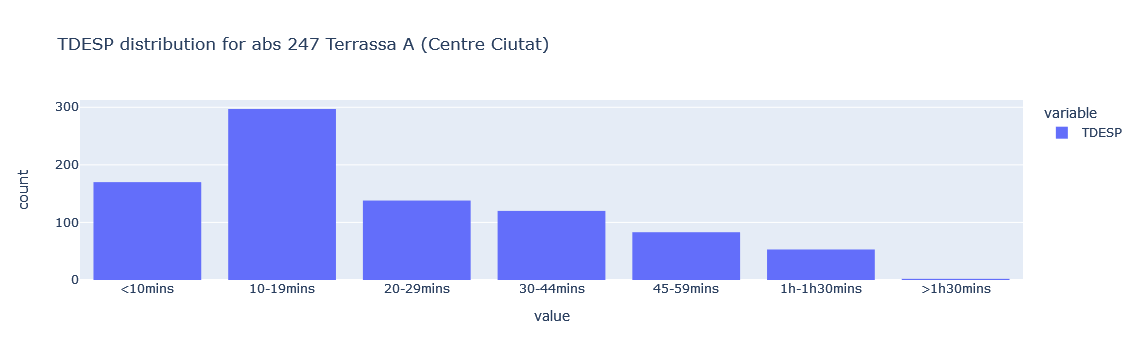

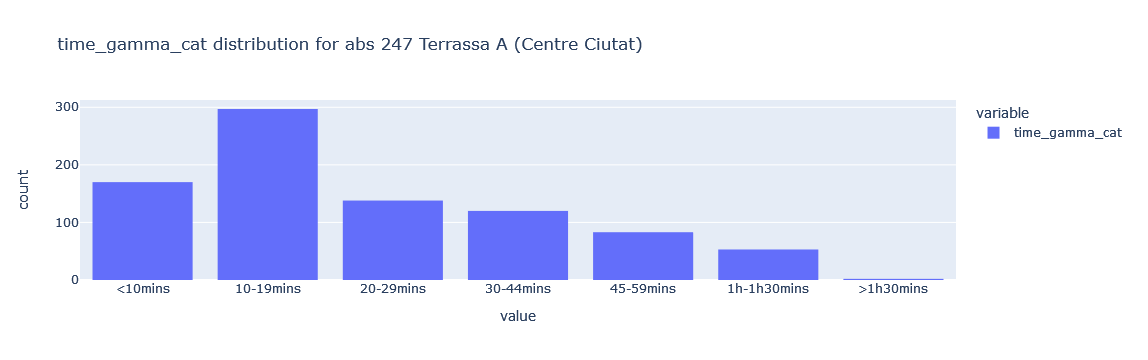

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

for i in range(len(dfs)):
    dfcens = dfs[i]
    dfcens.TDESP = dfcens.TDESP.replace({1: '<10mins', 2: '10-19mins', 3:'20-29mins', 4:'30-44mins',5:'45-59mins', 6:'1h-1h30mins', 7:'>1h30mins'})
    # print(dfcens.TDESP.unique())
    # print(dfcens)
    dfgp = dfcens.groupby('distance_categorical_GAMMAv2').count()
    dfgp['%'] = (dfgp['NSS'] / dfgp['NSS'].sum()) * 100
    num_abs = numabs[i]
    nom_abs = nameabs[i]
    filterllago = distanciesllago.abs_origen == int(num_abs)
    dfllago = distanciesllago[filterllago]  
    filterllago2 = distanciesllagoALL.abs_origen == int(num_abs)
    dfllago2 = distanciesllagoALL[filterllago2]  
    dfllago.distancia_perc = dfllago.distancia_perc * 100
    # dfllago2.distancia_perc = dfllago2.distancia_perc * 100
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=('Census distances',
                                    'BSC distances Morning',
                                       'BSC distances All day'))
    fig.add_trace(go.Bar(x= dfgp.index, y = dfgp['%']),row=1, col=1)
    fig.add_trace(go.Bar(x=dfllago.distancia, y = dfllago.distancia_perc),row=1, col=2)
    fig.add_trace(go.Bar(x=dfllago2.distancia, y = dfllago2.distancia_perc),row=1, col=3)
    fig.update_xaxes(categoryorder='array', categoryarray= ['0.5-2', '2-5', '5-10', '10-20', '20-50', '>50']) #categoryarray sempre les choices que tingui actives
    fig.update_layout(title_text="Comparison Census vs BSC distances for abs " +str(num_abs) + ' ' + str(nom_abs), showlegend=False)
    fig.show()
    figTDESPS = px.histogram(dfcens.TDESP, title = "TDESP distribution for abs " +str(num_abs) + ' ' + str(nom_abs))
    figTDESPS.update_xaxes(categoryorder='array', categoryarray= ['<10mins', '10-19mins', '20-29mins', '30-44mins', '45-59mins', '1h-1h30mins', '>1h30mins'])
    figTDESPS.show()
    figTDESPS = px.histogram(dfcens.time_gamma_cat, title = "time_gamma_cat distribution for abs " +str(num_abs) + ' ' + str(nom_abs))
    figTDESPS.update_xaxes(categoryorder='array', categoryarray= ['<10mins', '10-19mins', '20-29mins', '30-44mins', '45-59mins', '1h-1h30mins', '>1h30mins'])
    figTDESPS.show()

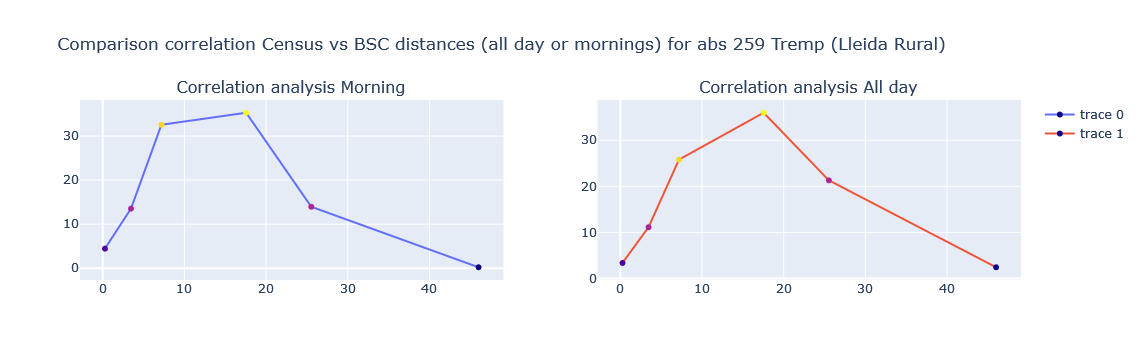

Correlation between Census and BSC data just morning is -0.3229087399386457
Correlation between Census and BSC data all day is -0.13544491223937316


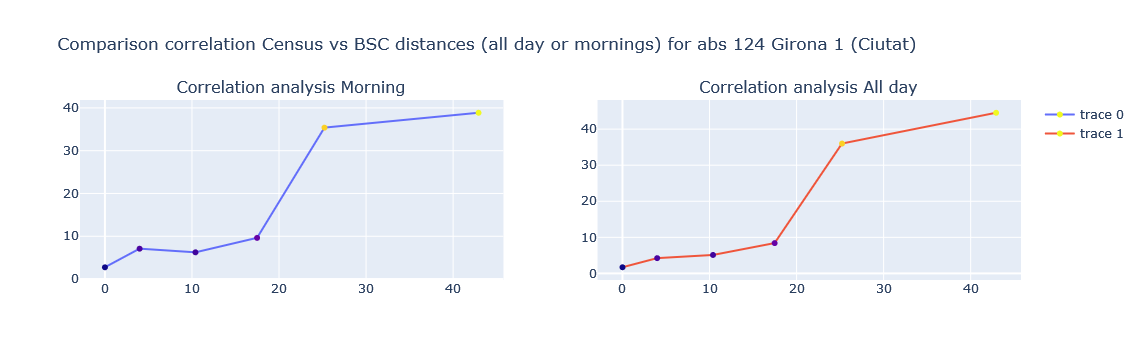

Correlation between Census and BSC data just morning is 0.9146809707095112
Correlation between Census and BSC data all day is 0.9346662967293837


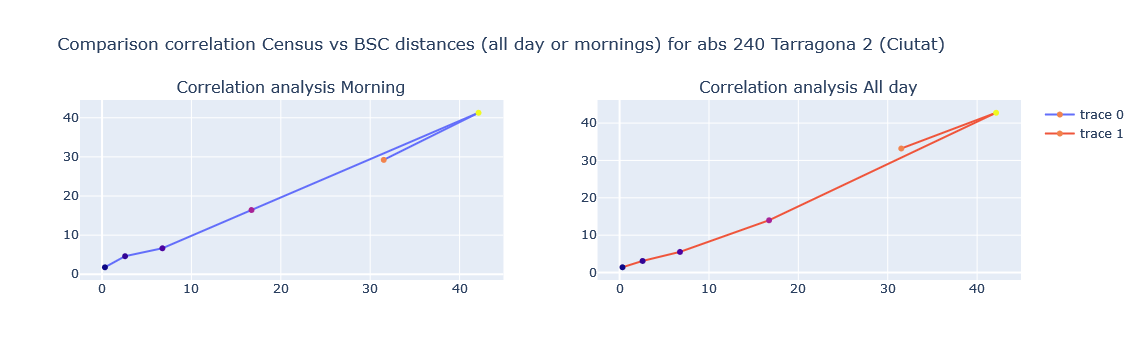

Correlation between Census and BSC data just morning is 0.998243066523756
Correlation between Census and BSC data all day is 0.9956099733792229


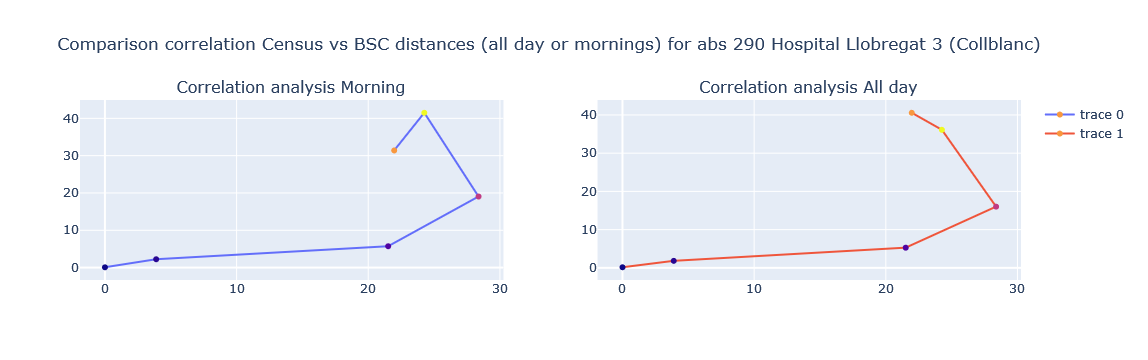

Correlation between Census and BSC data just morning is 0.7052123602991365
Correlation between Census and BSC data all day is 0.650556503339868


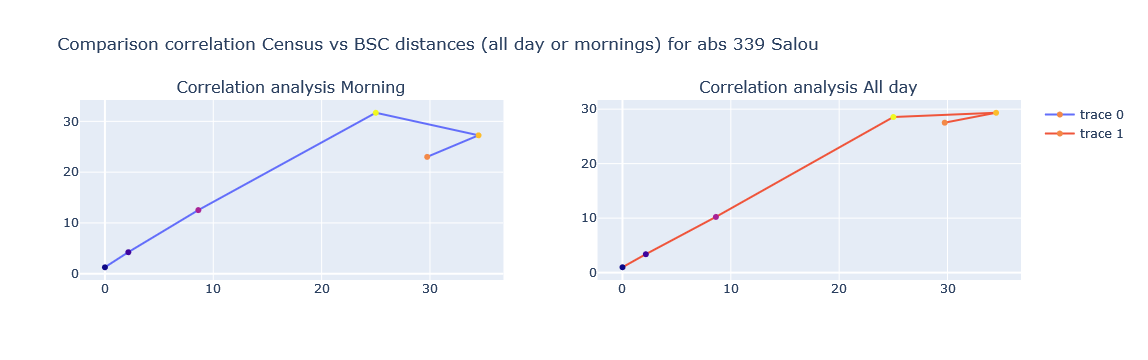

Correlation between Census and BSC data just morning is 0.9274162930195512
Correlation between Census and BSC data all day is 0.9817898035147934


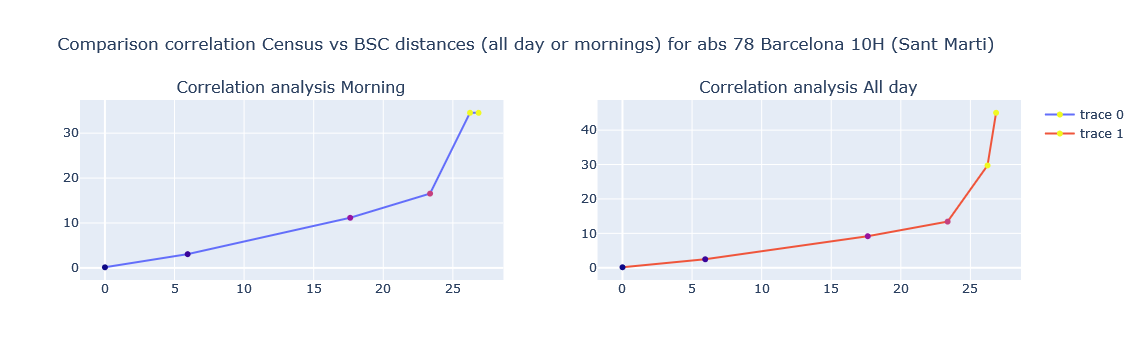

Correlation between Census and BSC data just morning is 0.9088297884993575
Correlation between Census and BSC data all day is 0.828621209606607


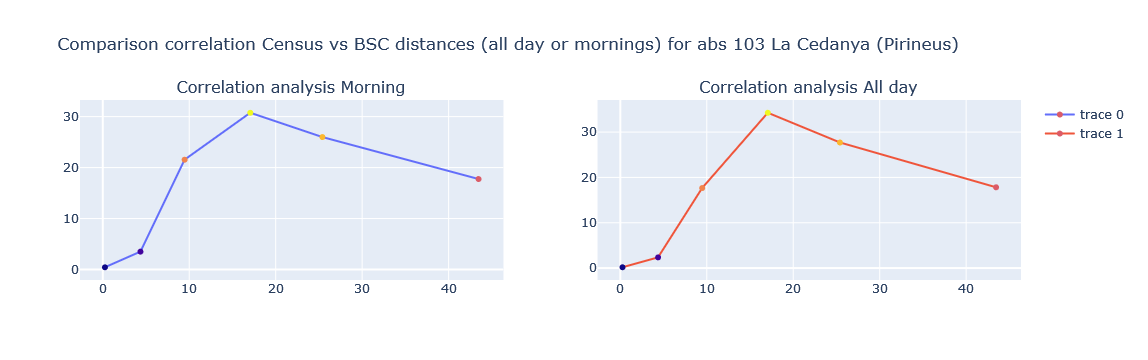

Correlation between Census and BSC data just morning is 0.5234460407604762
Correlation between Census and BSC data all day is 0.5343443219021128


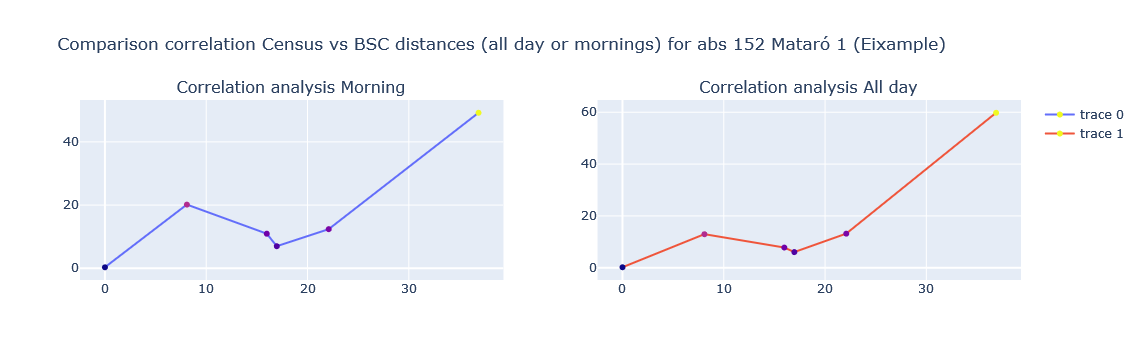

Correlation between Census and BSC data just morning is 0.8111998644837104
Correlation between Census and BSC data all day is 0.85319775042864


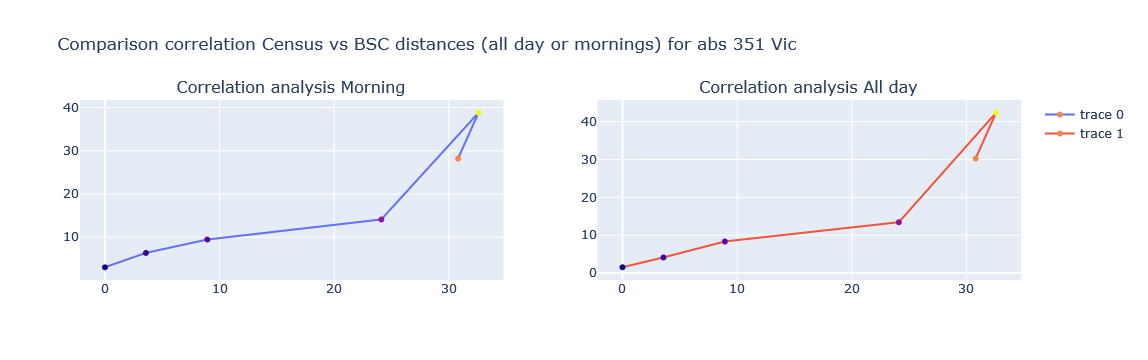

Correlation between Census and BSC data just morning is 0.9185120040004029
Correlation between Census and BSC data all day is 0.915961469278254


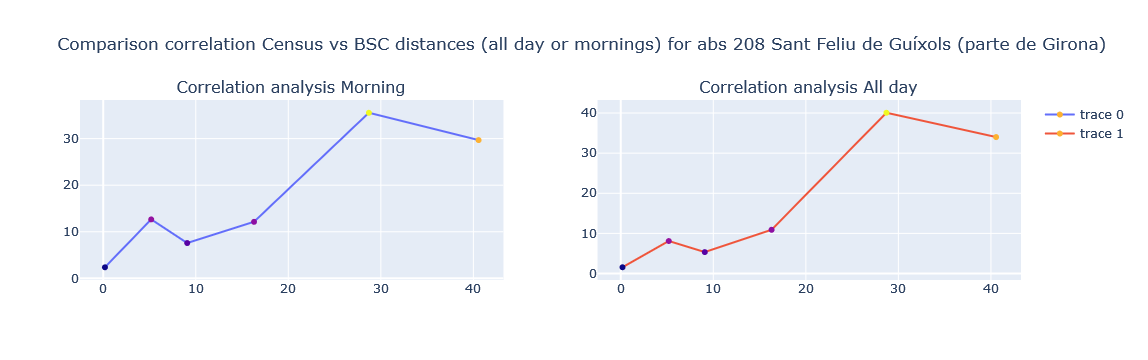

Correlation between Census and BSC data just morning is 0.8907124276739282
Correlation between Census and BSC data all day is 0.9107932998219921


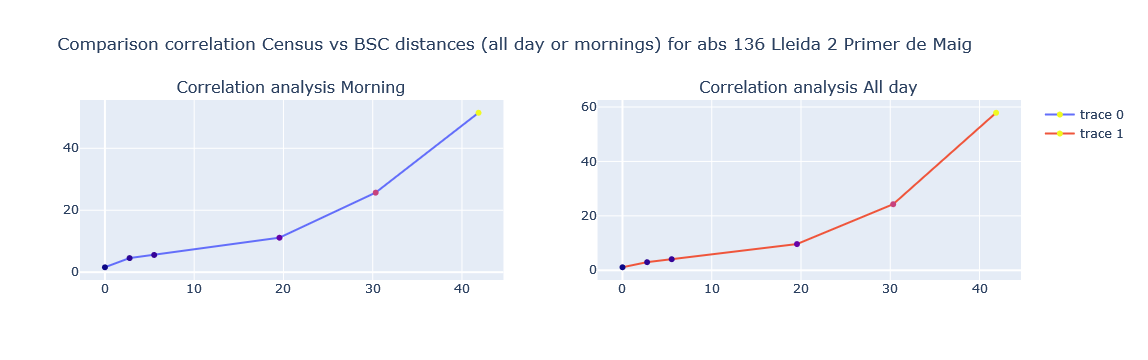

Correlation between Census and BSC data just morning is 0.9483706367376833
Correlation between Census and BSC data all day is 0.9268425565760877


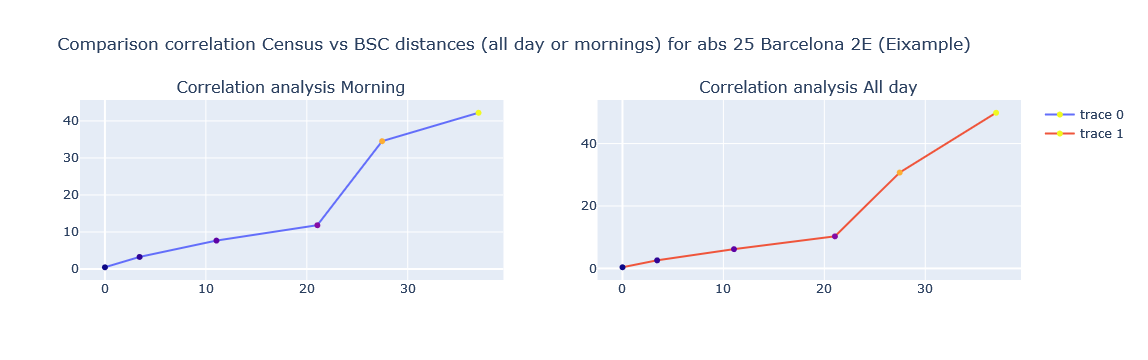

Correlation between Census and BSC data just morning is 0.9492402511604224
Correlation between Census and BSC data all day is 0.9353441523385152


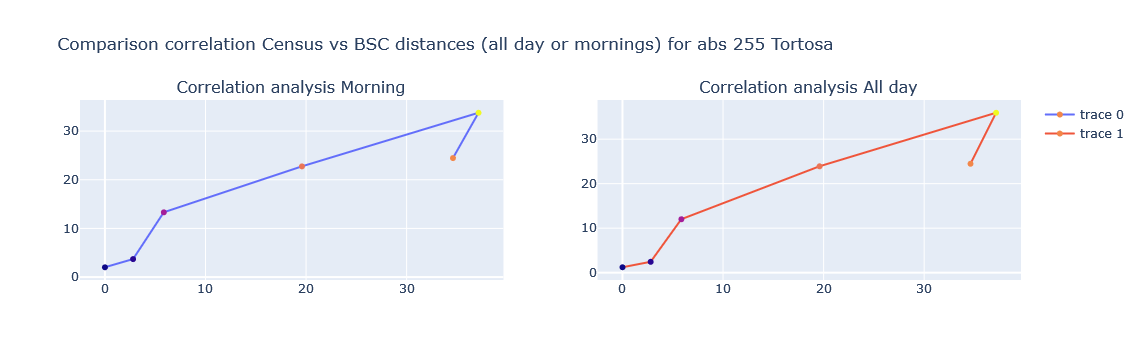

Correlation between Census and BSC data just morning is 0.9454320416100744
Correlation between Census and BSC data all day is 0.9427571795947668


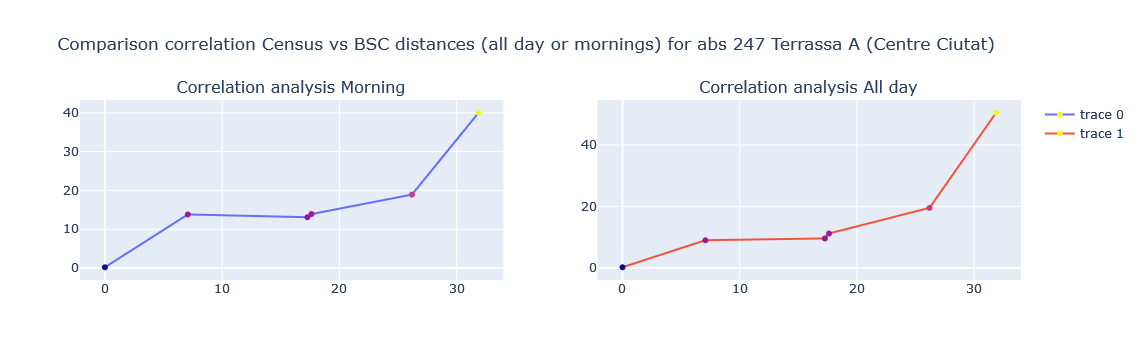

Correlation between Census and BSC data just morning is 0.8776870559289571
Correlation between Census and BSC data all day is 0.8457478552354196


In [6]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
corrmorning = []
corrallday = []
for i in range(len(dfs)):
    dfcens = dfs[i]
    dfcens.TDESP = dfcens.TDESP.replace({1: '<10mins', 2: '10-19mins', 3:'20-29mins', 4:'30-44mins',5:'45-59mins', 6:'1h-1h30mins', 7:'>1h30mins'})
    # print(dfcens.TDESP.unique())
    dfgp = dfcens.groupby('distance_categorical_GAMMAv2').count()
    dfgp['%'] = (dfgp['NSS'] / dfgp['NSS'].sum()) * 100
    num_abs = numabs[i]
    nom_abs = nameabs[i]
    filterllago = distanciesllago.abs_origen == int(num_abs)
    dfllago = distanciesllago[filterllago]  
    dfllago.distancia_perc = dfllago.distancia_perc * 100
    filterllago2 = distanciesllagoALL.abs_origen == int(num_abs)
    dfllago2 = distanciesllagoALL[filterllago2]
    # print(dfllago[['distancia', 'distancia_perc']])
    # print(dfgp['%'])
    dfgroupedmorning = dfllago.merge(dfgp, left_on = 'distancia', right_on = dfgp.index, how='left').fillna(0)
    dfgroupedall = dfllago2.merge(dfgp, left_on = 'distancia', right_on = dfgp.index, how='left').fillna(0)
    dfllago.distancia = dfllago.distancia.astype(str)
    groups = dfllago.distancia.unique()
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Correlation analysis Morning',
                                    'Correlation analysis All day'))
    fig.add_trace(go.Scatter(x = dfgroupedmorning['%'], y = dfgroupedmorning['distancia_perc'],marker=dict(color=dfgroupedmorning['distancia_perc'])),row=1, col=1)
    fig.add_trace(go.Scatter(x = dfgroupedall['%'], y = dfgroupedall['distancia_perc'], marker = dict(color=dfgroupedmorning['distancia_perc'])),row=1, col=2)
    fig.update_layout(legend_itemsizing ='trace')
    fig.update_layout(title_text="Comparison correlation Census vs BSC distances (all day or mornings) for abs " +str(num_abs) + ' ' + str(nom_abs))
    fig.show()
    # print(dfgroupedmorning[['%', 'distancia','distancia_perc']])
    # break
    correlationmorning = dfgroupedmorning['%'].corr(dfgroupedmorning['distancia_perc'])
    correlationwholeday = dfgroupedall['%'].corr(dfgroupedall['distancia_perc'])
    corrmorning.append(correlationmorning)
    corrallday.append(correlationwholeday)
    print('Correlation between Census and BSC data just morning is ' + str(correlationmorning))
    print('Correlation between Census and BSC data all day is ' + str(correlationwholeday))


In [7]:
def mean_list(list):
    return sum(list)/len(list)

print('Mean correlation taking into account just morninig working trips is ' + str(round(mean_list(corrmorning), 4)))
print('Mean correlation taking into account working trips all day is ' +str(round(mean_list(corrallday),4)))

Mean correlation taking into account just morninig working trips is 0.7854
Mean correlation taking into account working trips all day is 0.7943


In [8]:
for i in range(len(corrmorning)):
    print('For abs ' + str(nameabs[i]) + ' ' + str(numabs[i]) + ' the corelation is ' + str(round(corrmorning[i],4)))

For abs Tremp (Lleida Rural) 259 the corelation is -0.3229
For abs Girona 1 (Ciutat) 124 the corelation is 0.9147
For abs Tarragona 2 (Ciutat) 240 the corelation is 0.9982
For abs Hospital Llobregat 3 (Collblanc) 290 the corelation is 0.7052
For abs Salou 339 the corelation is 0.9274
For abs Barcelona 10H (Sant Marti) 78 the corelation is 0.9088
For abs La Cedanya (Pirineus) 103 the corelation is 0.5234
For abs Mataró 1 (Eixample) 152 the corelation is 0.8112
For abs Vic 351 the corelation is 0.9185
For abs Sant Feliu de Guíxols (parte de Girona) 208 the corelation is 0.8907
For abs Lleida 2 Primer de Maig 136 the corelation is 0.9484
For abs Barcelona 2E (Eixample) 25 the corelation is 0.9492
For abs Tortosa 255 the corelation is 0.9454
For abs Terrassa A (Centre Ciutat) 247 the corelation is 0.8777


In [9]:
for i in range(len(corrallday)):
    print('For abs ' + str(nameabs[i]) + ' ' + str(numabs[i]) + ' the corelation is ' + str(round(corrallday[i],4)))

For abs Tremp (Lleida Rural) 259 the corelation is -0.1354
For abs Girona 1 (Ciutat) 124 the corelation is 0.9347
For abs Tarragona 2 (Ciutat) 240 the corelation is 0.9956
For abs Hospital Llobregat 3 (Collblanc) 290 the corelation is 0.6506
For abs Salou 339 the corelation is 0.9818
For abs Barcelona 10H (Sant Marti) 78 the corelation is 0.8286
For abs La Cedanya (Pirineus) 103 the corelation is 0.5343
For abs Mataró 1 (Eixample) 152 the corelation is 0.8532
For abs Vic 351 the corelation is 0.916
For abs Sant Feliu de Guíxols (parte de Girona) 208 the corelation is 0.9108
For abs Lleida 2 Primer de Maig 136 the corelation is 0.9268
For abs Barcelona 2E (Eixample) 25 the corelation is 0.9353
For abs Tortosa 255 the corelation is 0.9428
For abs Terrassa A (Centre Ciutat) 247 the corelation is 0.8457


In [10]:
allminustrempm = corrmorning[1:]
allminustrempa = corrallday[1:]

first5m = allminustrempm[5:]
last5m = allminustrempm[7:]
allminustrempm = first5m + last5m

first5a = allminustrempa[5:]
last5a = allminustrempa[7:]
allminustrempa = first5a + last5a

mean_list(allminustrempm), mean_list(allminustrempa)

(0.885325338533366, 0.8816025070014873)

In [11]:
print('According to Census, there are 2.750.470 people travelling to work, while according to mobility reports there are 1.747.656 travels approx per day (mean of week of february)' + ' which represents ' + str(1747656/2750470) + '%')

According to Census, there are 2.750.470 people travelling to work, while according to mobility reports there are 1.747.656 travels approx per day (mean of week of february) which represents 0.6354026766334481%
